In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/cancer patient data sets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [4]:
df = df.drop(['Patient Id'], axis=1)


In [5]:
df = df[df['Level'] != 'Medium']


In [6]:
df.shape

(668, 25)

In [7]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,...,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000
mean,498.621257,36.455090,1.399701,4.290419,4.744012,5.026946,4.901198,4.723054,4.586826,4.977545,...,5.362275,4.038922,3.576347,4.044910,3.290419,3.540419,3.419162,3.467066,3.931138,2.73503
std,290.984425,11.412772,0.490204,1.954374,2.588530,2.180572,2.141011,2.142511,1.925900,2.140725,...,2.681585,2.516211,2.133163,2.391468,2.144572,2.175890,1.907389,1.785447,2.137280,1.41002
min,0.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,249.000000,27.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000
50%,486.500000,35.000000,1.000000,4.000000,5.000000,6.000000,5.000000,5.000000,5.000000,6.000000,...,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,2.00000
75%,763.250000,44.000000,2.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,8.000000,5.000000,6.000000,5.000000,4.500000,5.000000,4.000000,5.000000,6.000000,3.25000
max,999.000000,64.000000,2.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,7.000000,8.000000,9.000000,7.000000,7.000000,7.00000


In [8]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply label encoding on the 'Category' column
df['Level_encoded'] = le.fit_transform(df['Level'])

df.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Level_encoded
0,0,33,1,2,4,5,4,3,2,2,...,4,2,2,3,1,2,3,4,Low,1
2,2,35,1,4,5,6,5,5,4,6,...,7,9,2,1,4,6,7,2,High,0
3,3,37,1,7,7,7,7,6,7,7,...,2,3,1,4,5,6,7,5,High,0
4,4,46,1,6,8,7,7,7,6,7,...,2,4,1,4,2,4,2,3,High,0
5,5,35,1,4,5,6,5,5,4,6,...,7,9,2,1,4,6,7,2,High,0


In [9]:
df = df.drop(['Level'], axis=1)


In [10]:
df.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level_encoded
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,0
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,0
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,0
5,5,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,0


In [11]:
df.shape

(668, 25)

In [12]:
df.isnull().sum()

index                       0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level_encoded               0
dtype: int64

In [13]:
X = df.drop(['Level_encoded'], axis=1)
y = df['Level_encoded']

X.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,0,33,1,2,4,5,4,3,2,2,...,4,3,4,2,2,3,1,2,3,4
2,2,35,1,4,5,6,5,5,4,6,...,8,8,7,9,2,1,4,6,7,2
3,3,37,1,7,7,7,7,6,7,7,...,8,4,2,3,1,4,5,6,7,5
4,4,46,1,6,8,7,7,7,6,7,...,9,3,2,4,1,4,2,4,2,3
5,5,35,1,4,5,6,5,5,4,6,...,8,8,7,9,2,1,4,6,7,2


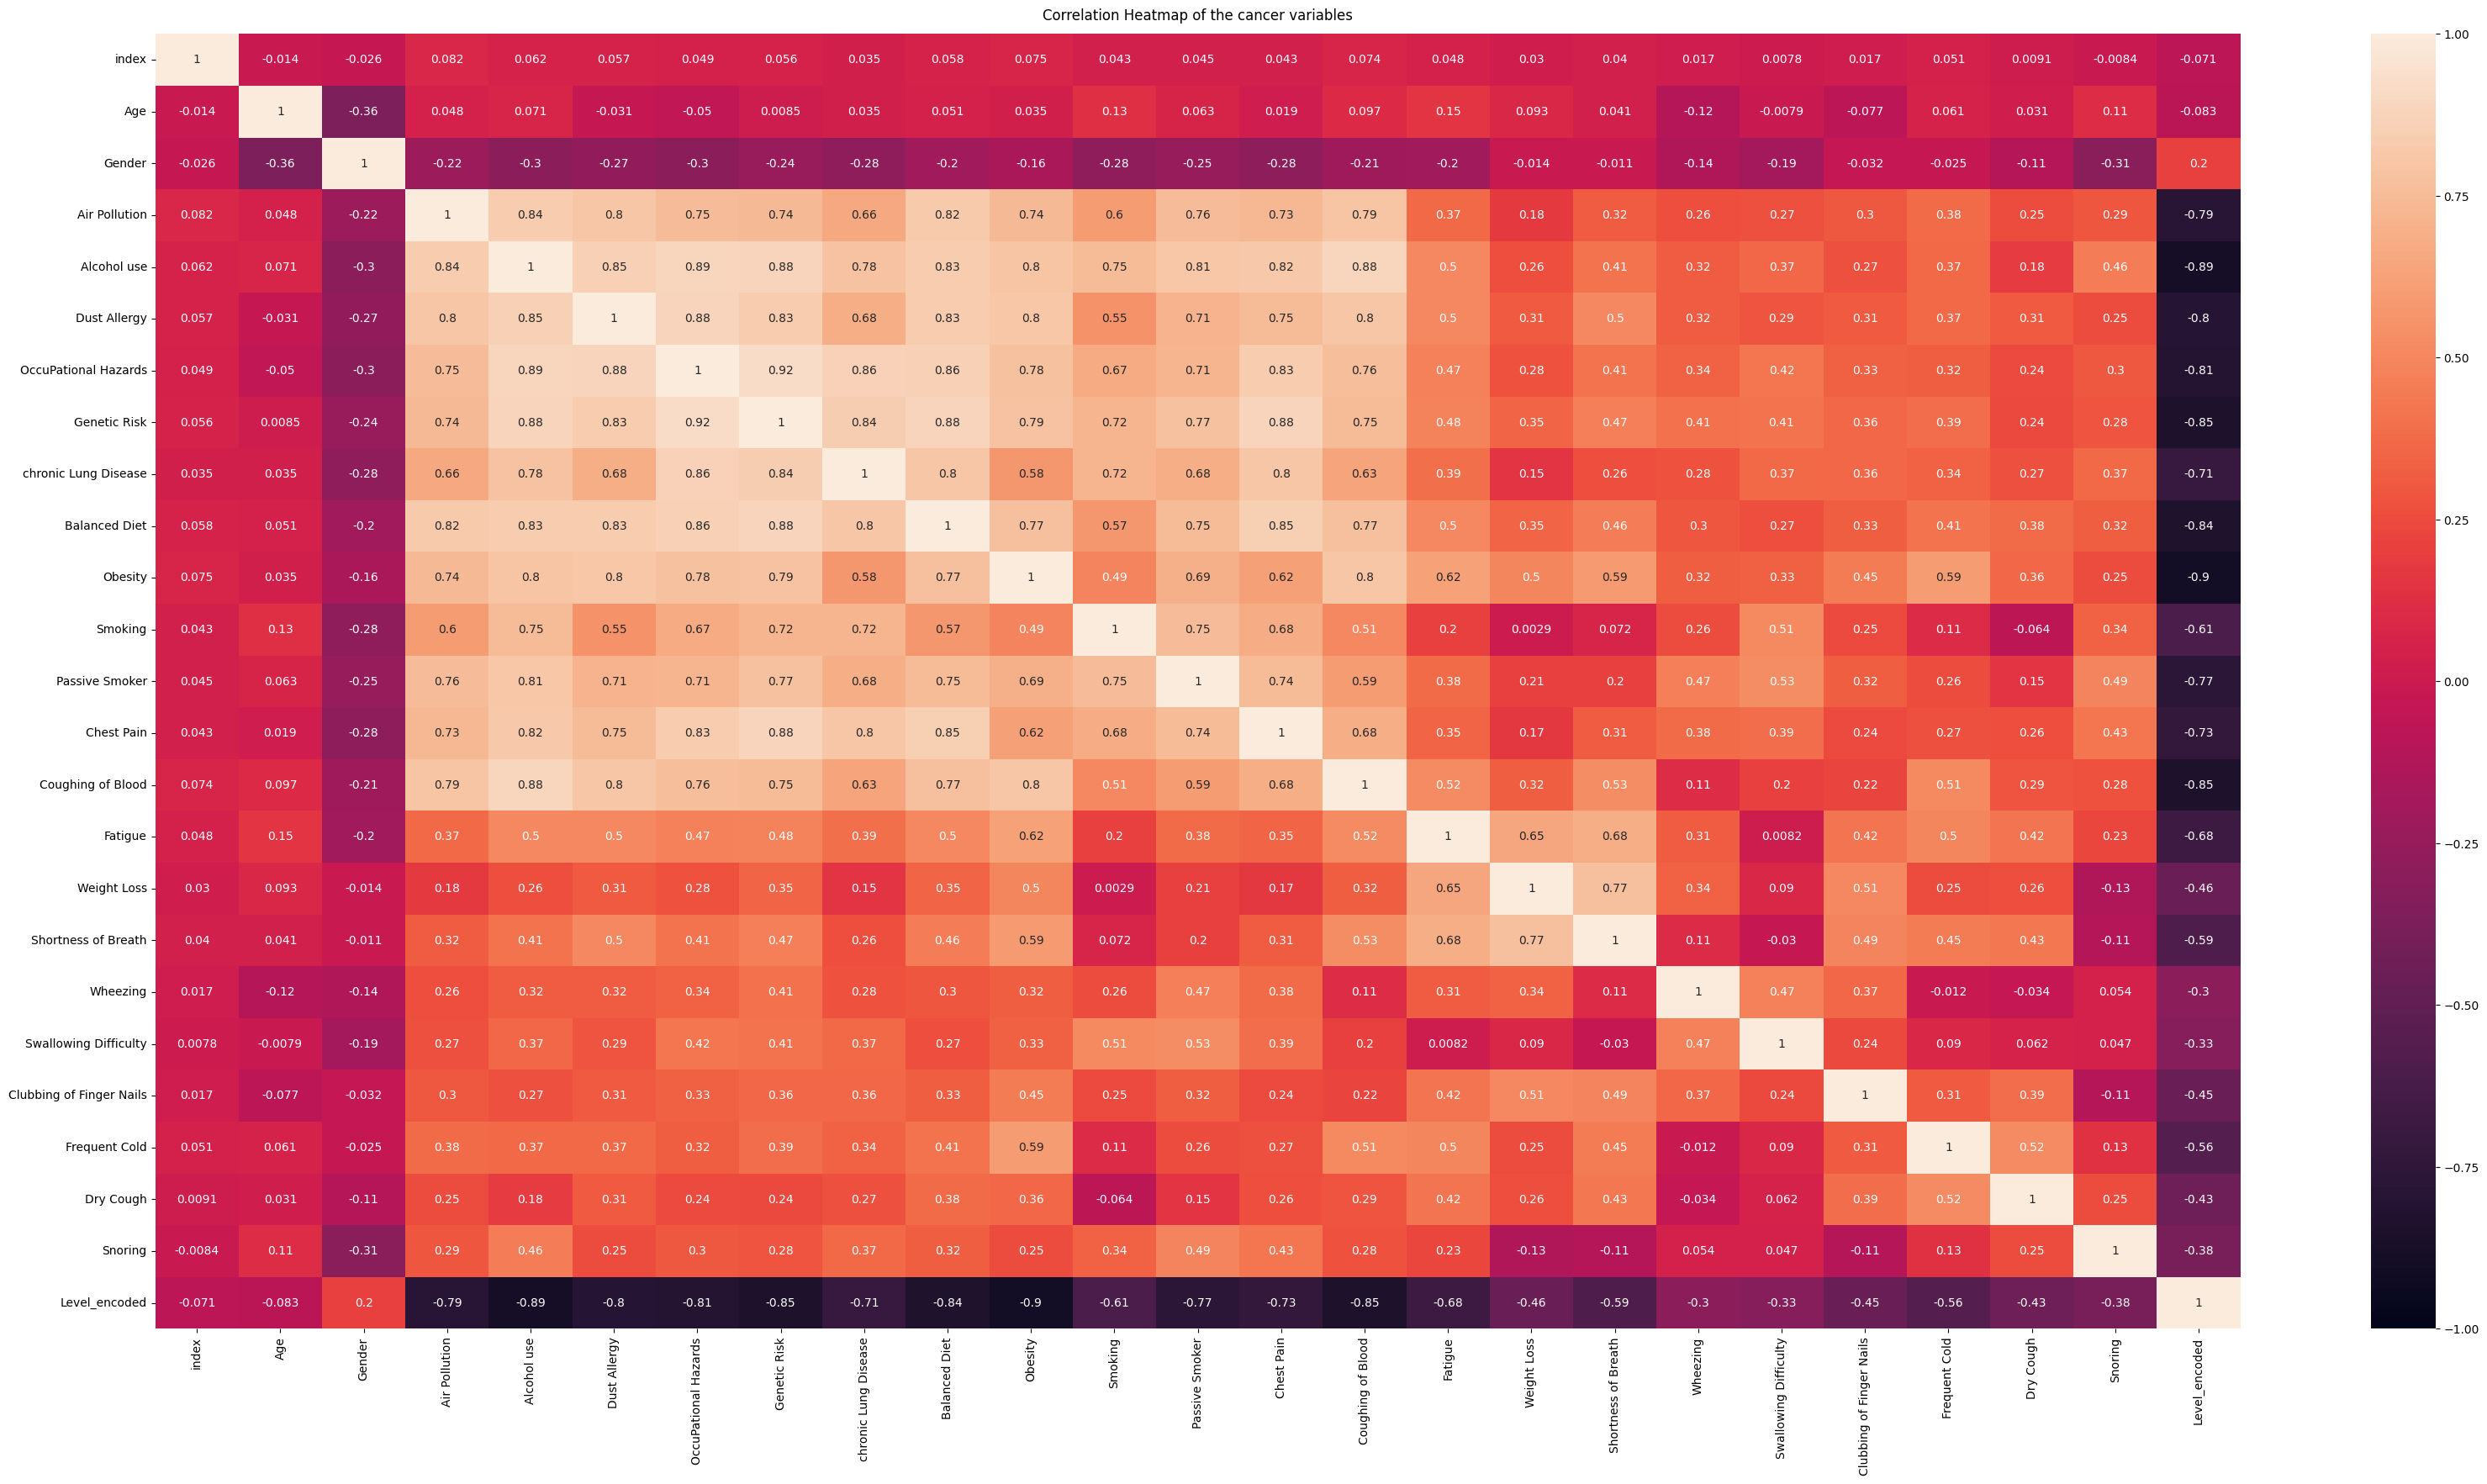

In [14]:
plt.figure(figsize=(40, 20))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap of the cancer variables', fontdict={'fontsize':12}, pad=12);

## DATA VISUALISATION

In [15]:
df.columns

Index(['index', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level_encoded'],
      dtype='object')

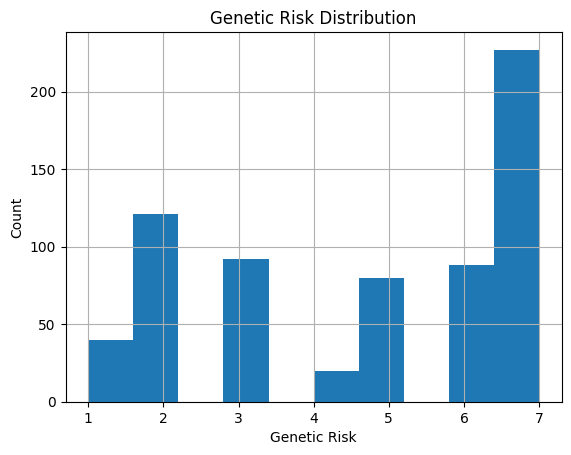

In [16]:
df['Genetic Risk'].hist()
plt.xlabel('Genetic Risk')
plt.ylabel('Count')
plt.title('Genetic Risk Distribution')
plt.show()

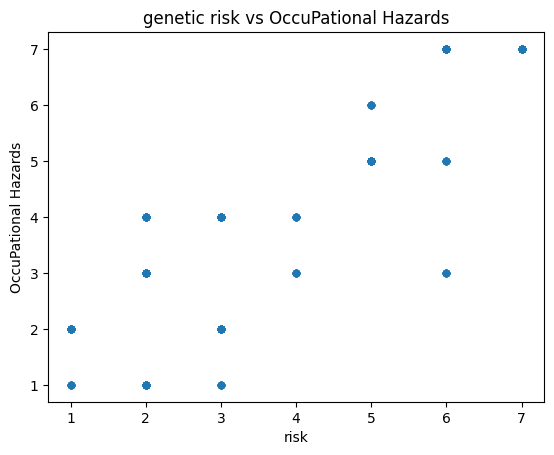

In [17]:
# Create a scatter plot of two numerical columns
df.plot.scatter('Genetic Risk', 'OccuPational Hazards')
plt.xlabel('risk')
plt.ylabel('OccuPational Hazards')
plt.title('genetic risk vs OccuPational Hazards')
plt.show()


<Axes: xlabel='Level_encoded', ylabel='count'>

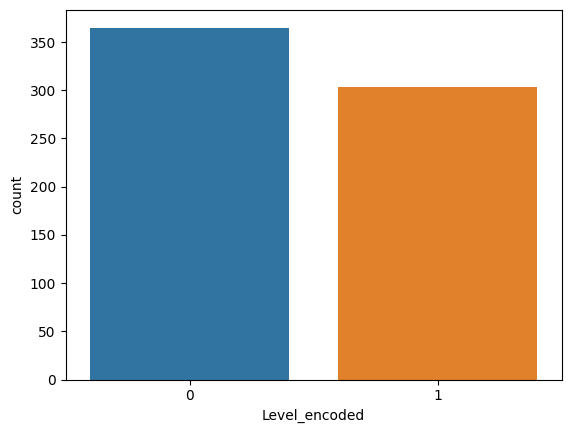

In [18]:
# The number of views in each categorical basket using bars.
sns.countplot(data= df , x='Level_encoded',label="Count")

<Axes: xlabel='Age', ylabel='Count'>

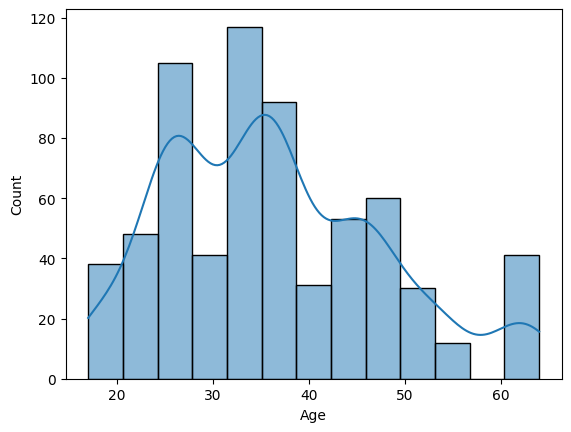

In [19]:
sns.histplot(df.Age,kde=True)


## LOGISTIC REGRESSION

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.20, random_state=0)


In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
#LogisticRegression()
lr.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1])

In [22]:
ypred=lr.predict(X_test)

In [23]:
lr.score(X_test, y_test)

0.9925373134328358

In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [26]:
precisio = precision_score(y_test, ypred)
recal = recall_score(y_test, ypred)


In [29]:
#print("Accuracy:", accuracy)
print("Precision:", precisio)
print("Recall:", recal)


Precision: 0.9852941176470589
Recall: 1.0


In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, ypred)
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[66  1]
 [ 0 67]]


Text(0.5, 23.52222222222222, 'Predicted label')

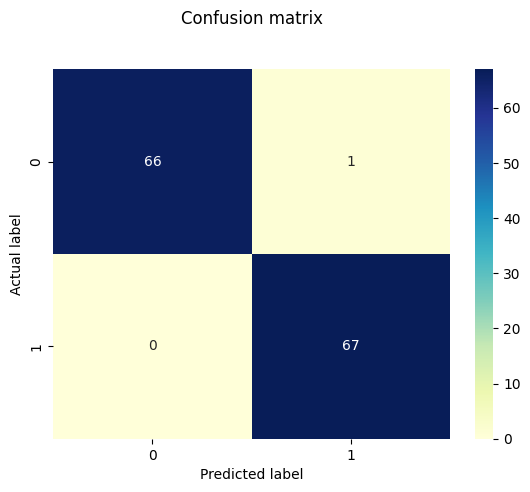

In [31]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### OPTIMISATION

## grid search

In [32]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to be optimized
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform the grid search for hyperparameter optimization
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [33]:
# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)



Best hyperparameters: {'C': 1, 'penalty': 'l1'}


In [34]:
# Print the best accuracy score
print("Best accuracy score:", grid_search.best_score_)

Best accuracy score: 1.0


### PSO ALGORITHM

In [35]:
import numpy as np
from sklearn.metrics import accuracy_score


class Particle:
    def __init__(self, initial_position):
        self.position = np.array(initial_position)
        self.velocity = np.array([0.0] * len(initial_position))
        self.best_position = np.array(initial_position)
        self.error = float('inf')

    def update_velocity(self, global_best_position, omega, phi_p, phi_g):
        r_p, r_g = np.random.random(2)
        self.velocity = omega * self.velocity + phi_p * r_p * (self.best_position - self.position) \
                        + phi_g * r_g * (global_best_position - self.position)

    def update_position(self):
        self.position += self.velocity


class PSO:
    def __init__(self, objective_func, num_particles, max_iter, omega, phi_p, phi_g):
        self.objective_func = objective_func
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.omega = omega
        self.phi_p = phi_p
        self.phi_g = phi_g
        self.global_best_position = None
        self.global_best_error = float('inf')
        self.particles = []

    def optimize(self):
        self.initialize_particles()
        for i in range(self.max_iter):
            for particle in self.particles:
                error = self.objective_func(particle.position)
                if error < particle.error:
                    particle.best_position = particle.position
                    particle.error = error
                if error < self.global_best_error:
                    self.global_best_position = particle.position
                    self.global_best_error = error
            for particle in self.particles:
                particle.update_velocity(self.global_best_position, self.omega, self.phi_p, self.phi_g)
                particle.update_position()

    def initialize_particles(self):
        self.particles = []
        for _ in range(self.num_particles):
            initial_position = [np.random.uniform(-5.0, 5.0),
                                np.random.uniform(-5.0, 5.0),
                                np.random.uniform(-5.0, 5.0)]
            particle = Particle(initial_position)
            self.particles.append(particle)

In [66]:

def objective_func(params):
       # Create a logistic regression model with the given parameters
    lr_pso = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=10**params[0], fit_intercept=True,
                            intercept_scaling=10**params[1], class_weight=None, random_state=None, solver='liblinear',
                            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

    # Train the model on the training data
    lr_pso.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = lr_pso.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    return 1 - accuracy
    y_pred = lr_pso.predict(X_test)
    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)
    # Calculate the precision and recall of the model
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)

    return 1 - accuracy

# Set the parameters for PSO
num_particles = 50
max_iter = 100
omega = 0.5
phi_p = 0.2
phi_g = 0.2

In [37]:
# Create a PSO object and optimize the parameters
pso = PSO(objective_func, num_particles, max_iter, omega, phi_p, phi_g)
pso.optimize()

# Print the optimized parameters and the corresponding accuracy
print("Optimized Parameters:")
print("C =", 10**pso.global_best_position[0])
print("Intercept Scaling =", 10**pso.global_best_position[1])
print("Accuracy =", 1 - pso.global_best_error)

Optimized Parameters:
C = 2.9541078492938957
Intercept Scaling = 29.9068204780291
Accuracy = 1.0


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [46]:
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)


In [47]:
#print("Accuracy:", accuracy)
#print("Precision:", precision)
#print("Recall:", recall)


## bar plot

In [49]:
metrics = ['Accuracy', 'Precision', 'Recall']
models = ['Ordinary logistic regression', 'PSO optimized logistic regression']
accuracy_scores = [0.99, 1.0]
precision_scores = [0.98, 1.0]
recall_scores = [1.0, 1.0]

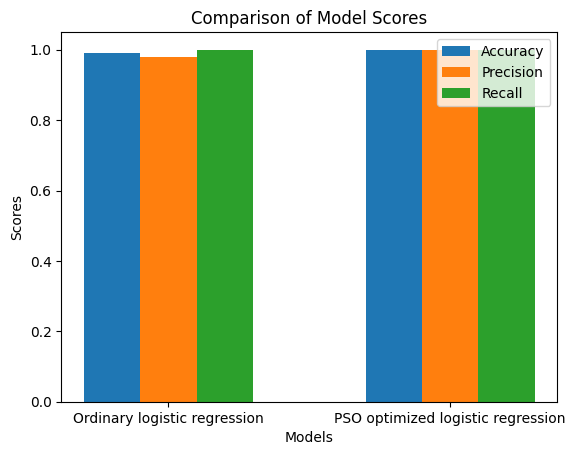

In [50]:
x = range(len(models))
width = 0.2

plt.bar(x, accuracy_scores, width, label='Accuracy')
plt.bar([i + width for i in x], precision_scores, width, label='Precision')
plt.bar([i + 2*width for i in x], recall_scores, width, label='Recall')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Scores')
plt.xticks([i + width for i in x], models)
plt.legend()

plt.show()

## convergence speed

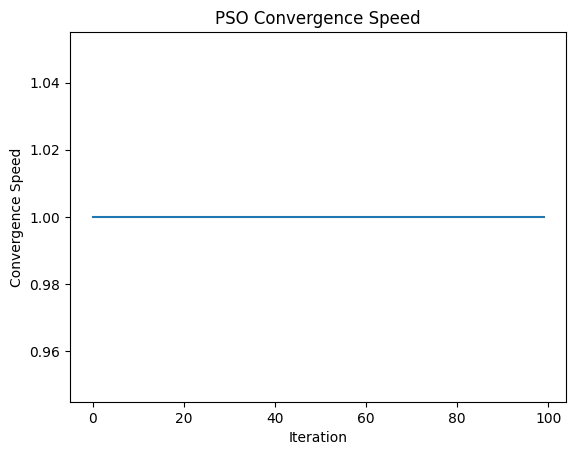

In [74]:
import matplotlib.pyplot as plt

# After pso.optimize() in the previous code

# Track global best error at each iteration
convergence_speed = []
for i in range(pso.max_iter):
    convergence_speed.append(1 - pso.global_best_error)

# Plot convergence speed
plt.plot(range(pso.max_iter), convergence_speed)
plt.xlabel('Iteration')
plt.ylabel('Convergence Speed')
plt.title('PSO Convergence Speed')
plt.show()


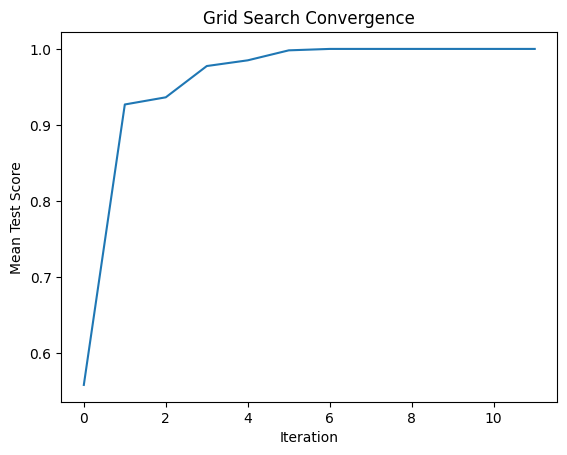

In [71]:
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)
grid_search_results = grid_search.cv_results_
iteration_count = range(len(grid_search_results['mean_test_score']))
mean_test_score = grid_search_results['mean_test_score']

plt.plot(iteration_count, mean_test_score)
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Convergence')
plt.show()


## SUPPORT VECTOR MACHINES

In [51]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# Perform feature selection using SelectKBest with ANOVA F-value scoring
feature_selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_train_selected = feature_selector.fit_transform(X_train, y_train)

In [52]:
# Get the selected feature indices
selected_features_indices = feature_selector.get_support(indices=True)

# Get the original feature names
selected_features_names = X.columns[selected_features_indices]

# Train an SVM model using only the selected features
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [53]:
# Evaluate the model
X_test_selected = X_test.iloc[:, selected_features_indices]
accuracy = clf.score(X_test, y_test)

# Print the selected feature names and accuracy
print("Selected Features: ", selected_features_names)


Selected Features:  Index(['Alcohol use', 'Genetic Risk', 'Balanced Diet', 'Obesity',
       'Coughing of Blood'],
      dtype='object')


In [54]:
print("Accuracy: ", accuracy)


Accuracy:  0.5


## RANDOM FOREST MODEL

In [55]:
from sklearn.ensemble import RandomForestClassifier  # for classification tasks
from sklearn.ensemble import RandomForestRegressor   # for regression tasks


In [56]:
# For classification:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# For regression:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [57]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [58]:
y_pred = rf_model.predict(X_test)


In [59]:
# For classification, you can calculate accuracy or other metrics:
accuracy = rf_model.score(X_test, y_test)


In [60]:
accuracy

1.0

In [61]:
from sklearn.metrics import roc_curve, auc
# Train the classifier

# Perform predictions on the test set
y_pred_prob = rf_model.predict(X_test)

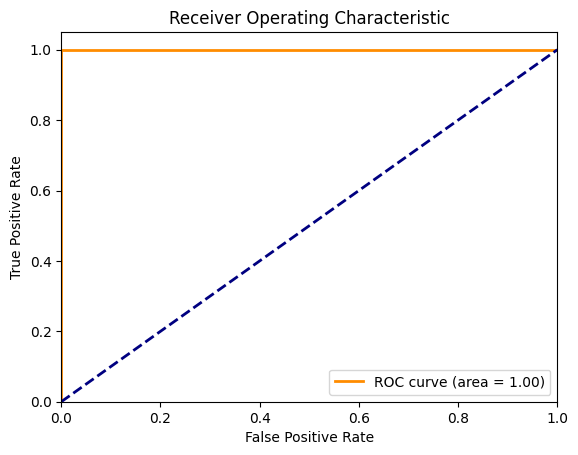

In [62]:
# Compute false positive rate and true positive rate for ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
